# Components

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from easydynamics.sample_model import DampedHarmonicOscillator
from easydynamics.sample_model import DeltaFunction
from easydynamics.sample_model import Gaussian
from easydynamics.sample_model import Lorentzian
from easydynamics.sample_model import Polynomial

%matplotlib widget

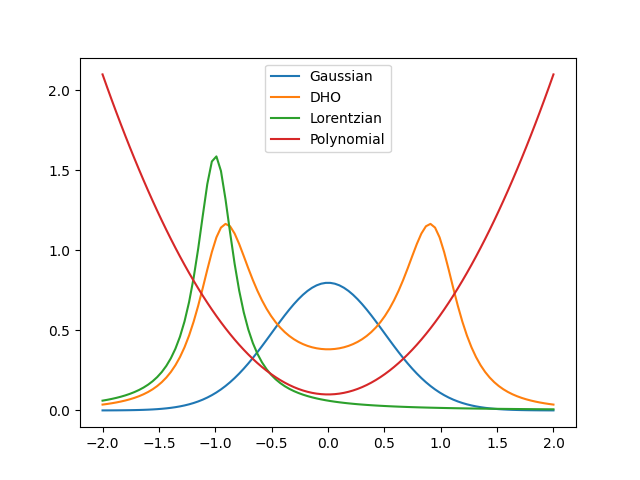

In [2]:
# Creating a component
gaussian = Gaussian(display_name='Gaussian', width=0.5, area=1)
dho = DampedHarmonicOscillator(display_name='DHO', center=1.0, width=0.3, area=2.0)
lorentzian = Lorentzian(display_name='Lorentzian', center=-1.0, width=0.2, area=1.0)
polynomial = Polynomial(display_name='Polynomial', coefficients=[0.1, 0, 0.5])  # y=0.1+0.5*x^2

x = np.linspace(-2, 2, 100)

plt.figure()
y = gaussian.evaluate(x)
plt.plot(x, y, label='Gaussian')
y = dho.evaluate(x)
plt.plot(x, y, label='DHO')
y = lorentzian.evaluate(x)
plt.plot(x, y, label='Lorentzian')
y = polynomial.evaluate(x)
plt.plot(x, y, label='Polynomial')
plt.legend()
plt.show()

In [3]:
# The area under the DHO curve is indeed equal to the area parameter.
xx = np.linspace(-15, 15, 10000)
yy = dho.evaluate(xx)
area = np.trapezoid(yy, xx)
print(f'Area under DHO curve: {area:.4f}')

Area under DHO curve: 1.9999


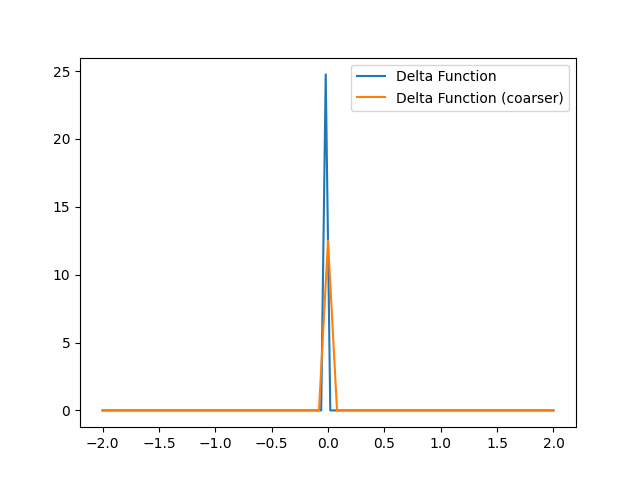

0.9999999999999999


In [4]:
delta = DeltaFunction(display_name='Delta', center=0.0, area=1.0)
x1 = np.linspace(-2, 2, 100)
y = delta.evaluate(x1)
x2 = np.linspace(-2, 2, 51)
y2 = delta.evaluate(x2)
plt.figure()
plt.plot(x1, y, label='Delta Function')
plt.plot(x2, y2, label='Delta Function (coarser)')
plt.legend()
plt.show()
# The area under the Delta function is indeed equal to
# the area parameter.
xx = np.linspace(-2, 2, 10000)
yy = delta.evaluate(xx)
area = np.trapezoid(y, x1)
print(area)

/home/runner/work/dynamics-lib/dynamics-lib/src/easydynamics/sample_model/components/model_component.py:99: UserWarning: Input x has unit µeV, but Polynomial component                         has unit meV.                             Converting Polynomial to µeV.
  warnings.warn(


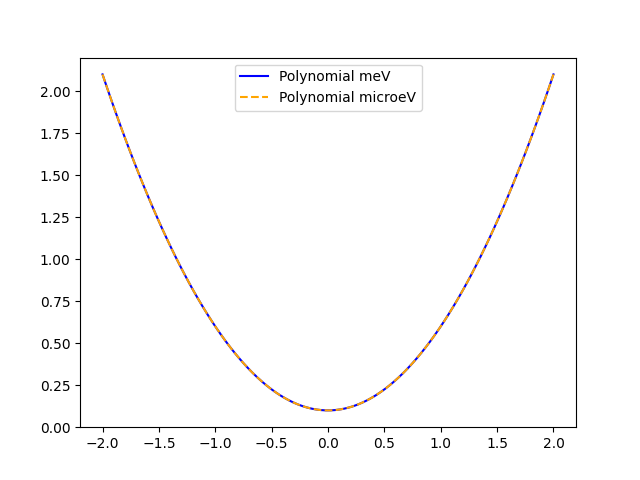

In [5]:
import scipp as sc

x1 = sc.linspace(dim='x', start=-2.0, stop=2.0, num=100, unit='meV')
x2 = sc.linspace(dim='x', start=-2.0 * 1e3, stop=2.0 * 1e3, num=101, unit='microeV')

polynomial = Polynomial(display_name='Polynomial', coefficients=[0.1, 0, 0.5])  # y=0.1+0.5*x^2
y1 = polynomial.evaluate(x1)
y2 = polynomial.evaluate(x2)

plt.figure()
plt.plot(x1.values, y1, label='Polynomial meV', color='blue')
plt.plot(x2.values / 1000, y2, label='Polynomial microeV', linestyle='dashed', color='orange')
plt.legend()
plt.show()